## Question:-5

          1. Generate Synthetic clustering datasets dataset of groups in 2-dimensional space in python using make_blobs() function.

          2. Consider the Iris data set also for clustering.
   
     Then apply K-means, Hierarchichal clustering algorithms to find out optimal clusters present in the data sets. Calculate the measure of performances (NMI, F-Measure). Plot the Elbow method to determine number of clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import normalized_mutual_info_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

### Creating Synthetic Data

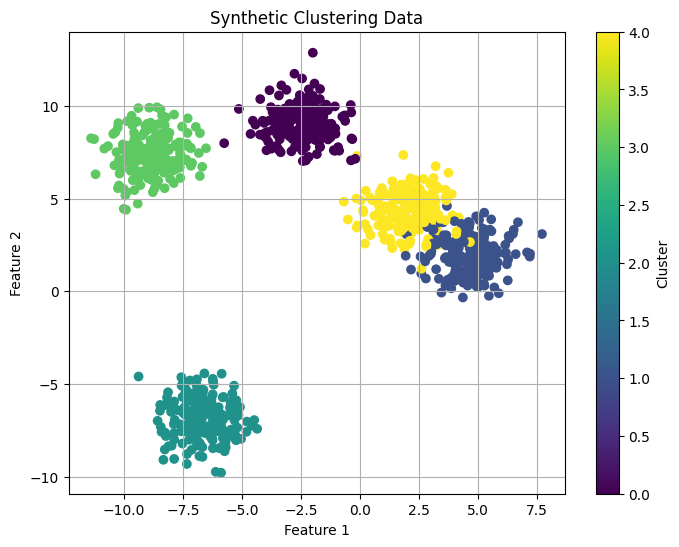

In [2]:

# Generate synthetic clustering data
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=42)

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Synthetic Clustering Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Iris Dataset


In [3]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Standardize features
scaler = StandardScaler()
X_iris_std = scaler.fit_transform(X_iris)

iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Elbow Method

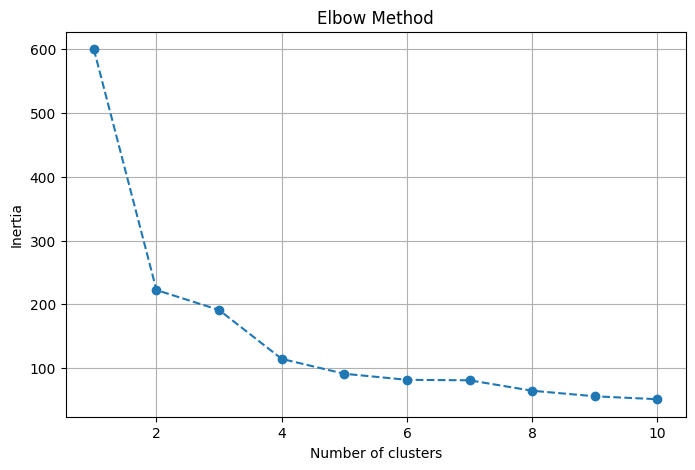

In [4]:
# Plot Elbow method for K-means to determine optimal number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_iris_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


### Applying Clustering

In [5]:
# Perform PCA for visualization
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris_std)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_iris_std)

# Hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(X_iris_std)

# Evaluate clustering performance
nmi_kmeans = normalized_mutual_info_score(y_iris, kmeans_labels)
f1_kmeans = f1_score(y_iris, kmeans_labels, average='weighted')

nmi_agg = normalized_mutual_info_score(y_iris, agg_labels)
f1_agg = f1_score(y_iris, agg_labels, average='weighted')

print("K-means clustering - NMI:", nmi_kmeans, "F-Measure:", f1_kmeans)
print("Hierarchical clustering - NMI:", nmi_agg, "F-Measure:", f1_agg)

K-means clustering - NMI: 0.6094233720718883 F-Measure: 0.0
Hierarchical clustering - NMI: 0.6634138658193796 F-Measure: 0.3466329966329966


### Visualizing the clusters

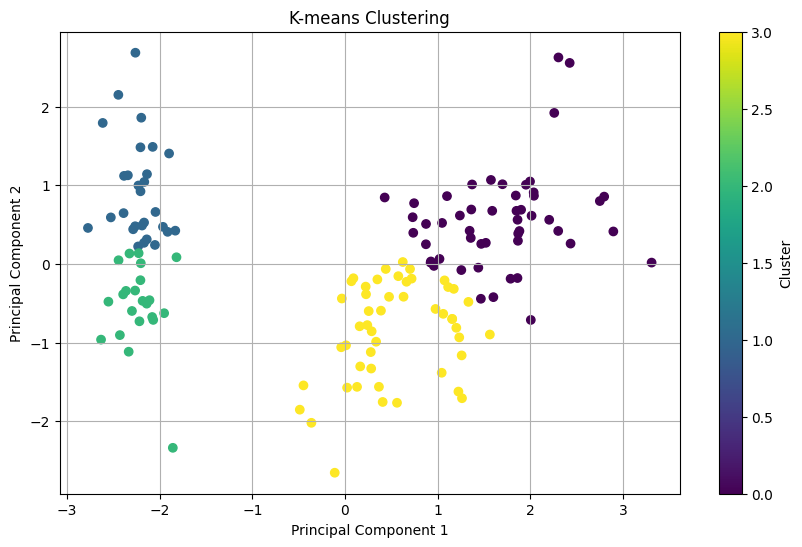

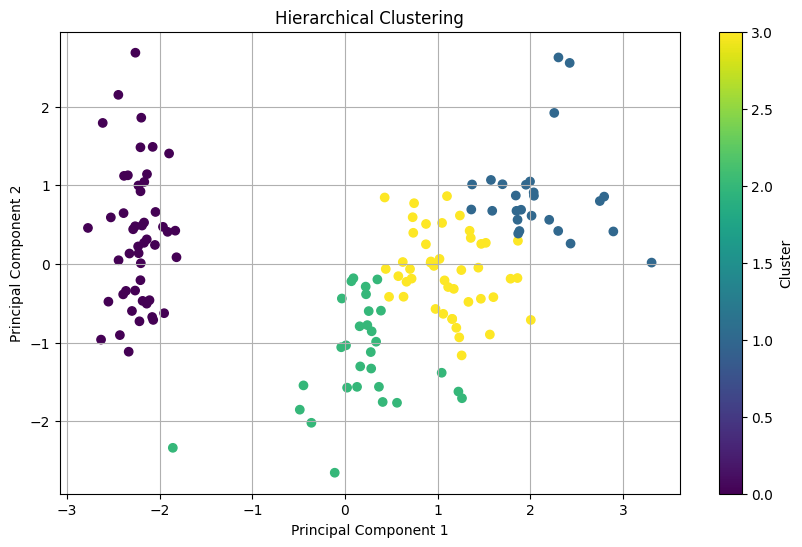

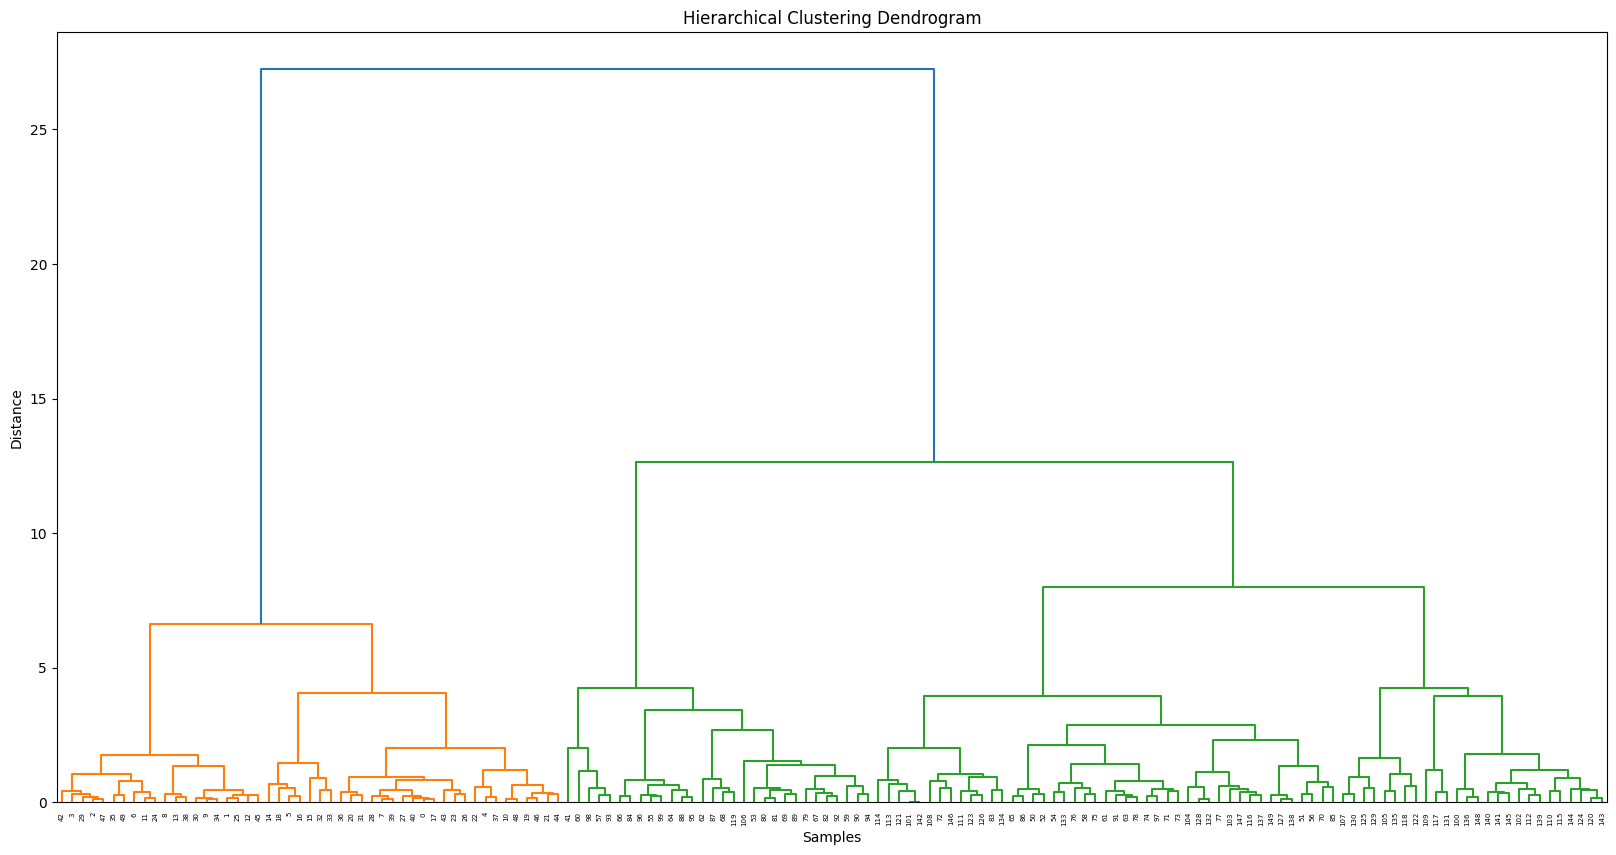

In [11]:
# Plot clusters formed by K-means
plt.figure(figsize=(10, 6))
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Plot clusters formed by Hierarchical clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Hierarchical clustering dendrogram
plt.figure(figsize=(20,10))
linkage_matrix = linkage(X_iris_std, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
